# Task 3

In [ ]:
# Setting Library

import os                             # Help to process file path
import numpy as np                   # Algebra

import tensorflow as tf              # Only used for data processing - One hot encoding
import itertools
import collections

import matplotlib.pyplot as plt      # Visualization
import seaborn as sns  # Fancier plots
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

# Set the seed for reproducability
np.random.seed(seed=42)


## Dataset Loading & Seperation 


In [2]:
# def load_mnist(path, kind='train'):
def load_mnist(path, kind='train'):
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte'% kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte'% kind)
    
    with open(labels_path,'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)
    
    with open(images_path,'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

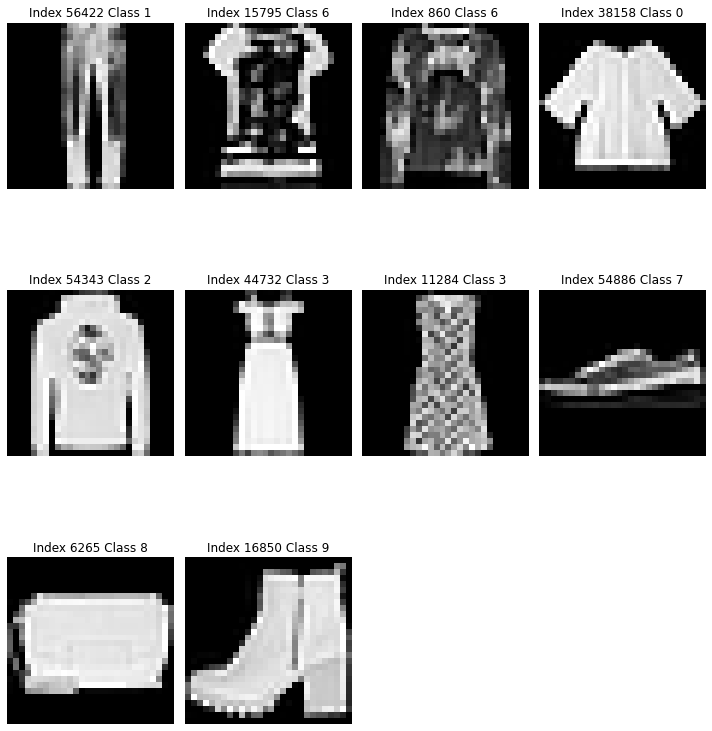

In [3]:
X_train, y_train = load_mnist('.', kind='train')
X_test, y_test = load_mnist('.', kind='t10k')

X_train, y_train = load_mnist('.', kind='train')
X_test, y_test = load_mnist('.', kind='t10k')


index = list(np.random.randint(60000,size=10))
plt.figure(figsize=(10, 15)) 
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[index[i]].reshape(28,28), cmap='gray')
    plt.title("Index {} Class {}".format(index[i], y_train[index[i]]))
    plt.axis('off')
    plt.tight_layout()




## Data Processing 

In this section, the input and output parameters will be processed to be ready for further analysis. 


#### One Hot Encoding 

One hot encoding technique is used for output parameters as the datasets have ten classes with a unique integer for each. One hot encoding is used for converting the unique target value of each sample to a ten element binary vector with a value of 1 for the index to show the class value. Kears library is used to carry out one hot encoding process for the output parameter.

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### Normalization 

Pixel values for the image in the dataset are unsigned integers ranging from 0 to 255, black from white. Hence, scaling the pixel value is required for better neural network performance. Normalization is introduced to process the input pixel data of the grayscale image. The general normalization process converts the unsigned integers to the floats to get precise scaled values. And then dividing each pixel value by the maximum pixel value (255). 

Furthermore, Testing datasets are split into final testing data and validation data. Validation datasets are used to prevent overfitting problems during neural network training and help set early stopping criteria.

In [5]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Split the test data into validation data and final test data
# Validation data is used to 
(X_val, X_test, y_val, y_test) = train_test_split(X_test, y_test, test_size=0.5)

# Scale pixels
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

Check the shape of each input dataset to help broadcasting in later process.

In [6]:
# Shows the shape of the pre-processed dataset to help the layer of the neural networks implement 
print("X_train shape : " + str(X_train.shape))
print("y_train shape : " + str(y_train.shape))
print("X_test shape : " + str(X_test.shape))
print("y_test shape : " + str(y_test.shape))
print("X_val shape : " + str(X_val.shape))
print("y_val shape : " + str(y_val.shape))

X_train shape : (60000, 784)
y_train shape : (60000, 10)
X_test shape : (5000, 784)
y_test shape : (5000, 10)
X_val shape : (5000, 784)
y_val shape : (5000, 10)


### Evaluation of Dataset Loading & Processing

The dataset was loaded and separated into training and testing data in the previous executable cell. The training and testing data's target values (class) and the feature value (values for each pixel) are also separated. By checking the shape of the dataset, there is 60000 set of training data with one target value and 784 feature values and 5000 sets of testing and validation data with one target value and 784 feature values. The dataset loading and separation were successful, obtained from the random image selection in which the image matches the class. One hot encoding and normalization are applied to the loaded dataset to achieve a better neural network's performance.

## Implement Sigmoid, ReLu & Softmax Layer

Setting a Generalization Layer Model for Neural Networks to help build activation layers used for NN architecture modelling.

In [7]:
class Layer(object):                    # To create a base layer function to help building each activation layer with forward and backward pass 
    def parameters_iteration(self):     # A function to interate parameters include weight and bias 
        return []
    def parameters_gradient(self, X, output_error):  # Function to return the parameter gradients
        return []
    def forward_output(self, X):        # Define a forward pass to get the forward output, X is the input
        pass
    def backword_output(self, y, output_error=None, Target=None):   # Difine a backward pass the get the update parameter gradient and return to the layer
        pass                  # y is target value, output_error is the calculated gradient value at hidden layer, T is the claculated output error at output layer 

- parameters_iteration is the function used to iterate the parameter (e.g. weight,bias)
- parameters_gradient is the derivatives of parameters 
- forward_output is the forward pass output of each layer
- backword_output is the backward pass output of each layer

### Sigmoid Layer
The sigmoid function is a logistic function (nonlinearity) used to scale all input to a value between 0 and 1. The sigmoid function is an essential part of logistic regression, which modifies the binary classification of linear regression. Below is the mathmatical equation of both forward and backward functions for Sigmoid. It will be helpful when programming the Sigmoid function in python.

Reference: https://mlfromscratch.com/activation-functions-explained/#relu

Forward_Sigmoid_Function
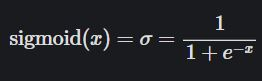

Backward_Sigmoid_Function
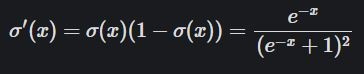

In [8]:
# Implement Sigmoid Function
def sigmoid(x):           # Create a Sigmoid Function with input value for forward pass        
    return 1 / (1 + np.exp(-x))   # Sigmoid Function for Forward 
def d_sigmoid(y):      # Create a Sigmoid Function with input value for backward pass 
    return y*(1-y)               # Sigmoid Function for Backward 

#  Define a Sigmoid Layer to apply sigmoid function to the inputs
class Sigmoid_Layer(Layer):     
    def forward_output(self, x):              # Define a forward pass of sigmoid function
        return sigmoid(x)                      
    def backword_output(self, y, output_error):    # Define a backward pass of sigmoid function 
        return np.multiply(d_sigmoid(y), output_error)
# output_error = (actural target value - forward_output)

### ReLu Layer
ReLu (Rectified Linear Unit) function can fix the problem about vanishing gradient, and the computing time and space complexity are relatively low compared to the other activation function. The mathematical equation about ReLu is shown below.

Reference: https://mlfromscratch.com/activation-functions-explained/#relu

Forward_ReLu_Function
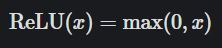
If the input x is less than 0, set input to 0
If the input is greater than 0, remain input

Backward_ReLu_Function
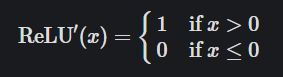

In [9]:
# Implement ReLu Function
def relu(x):       # Create a ReLu Function with input value for forward pass 
    return np.maximum(z, 0)      # Forward ReLu Function
def d_relu(x):     # Create a ReLu Function with input value for backward pass
    return 1. * (x > 0)          # Backward ReLu Function 

#  Define a ReLu Layer to apply ReLu function to the inputs
class Relu_Layer(Layer):
    def forward_output(self, X):  # Define a forward pass of ReLu activation function
        return relu(X)
    def backword_output(self, y, output_error):   # Define a backward pass of ReLu activation function
        return np.multiply(d_relu(y), output_error)
# output_error = (actural target value - forward_output)

### Softmax Output Layer 
The Softmax function returns the likelihood of each collection of multi-categories, with the target category having the highest probability. It is used for multi-category model prediction. The mathematical equation about Softmax is shown below.

Reference: https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1

Forward_Softmax_Function
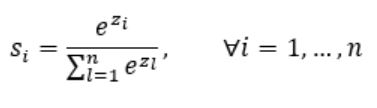

Backward_Softmax_Function
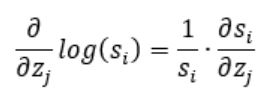

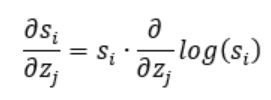

Cross-Entropy Loss functions are also applied to the softmax output layer to measure the model's performance, widely used for classification neural networks. The mathematical equation about Softmax is shown below.

Reference: https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

Cross_Entropy Loss Function

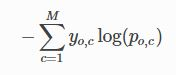

In [1]:
# Implement Softmax Function
def softmax(x):       # Create a Softmax output Function with input value 
    return np.exp(x) / np.sum(np.exp(x), axis=1,keepdims=True)  # Forward Softmax Function

#  Define a Softmax Output Layer to apply Softmax function to the inputs
class Softmax_Output_Layer(Layer):
    def forward_output(self, x):      # Define a forward pass of Softmax activation function
        return softmax(x)
    def backword_output(self, y, Target):   # Define a backward pass of Softmax activation function
        return (y - Target) / y.shape[0]
    def cost(self, y, Target):             # Apply a Cross-Entropy loss function to measure the performance of the Neural Networks
        return - np.multiply(Target, np.log(y)).sum() / y.shape[0] 

NameError: name 'Layer' is not defined

## Implement Neural Networks 

In order to build a Neural Networks Architecture, a layer with linear function is required to input parameters (e.g. weights & bias) and transform input data within the network's hidden layers.

Reference for the code: https://peterroelants.github.io/posts/neural-network-implementation-part05/

In [11]:
# Define a function to build a initial weight matrix for each layer
# Reference: Tutorial lab6_ex_2
from scipy.stats import truncnorm                          
def truncated_normal(mean=0, sd=1, low=0, upp=10):       
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
# scipy.stats.truncnorm is used to create a truncated normal continuous random variable.

In [12]:
class Linear_Layer(Layer):
    def __init__(self, no_of_in_nodes, no_of_out_nodes):  # Setting number of nodes in each layer
        self.W = truncated_normal(mean=1, sd=1, low=-0.5, upp=0.5).rvs((no_of_in_nodes, no_of_out_nodes)) # input init weight for each layer
        self.b = np.zeros(no_of_out_nodes)                              # input init bias value for each layer
    def parameters_iteration(self):              # Defien a function to iterate the update parameters (weight and bias)
        return itertools.chain(
            np.nditer(self.W, op_flags=['readwrite']),
            np.nditer(self.b, op_flags=['readwrite']))
    def forward_output(self, X):               # Define the forward pass linear function 
        return X.dot(self.W) + self.b
    def parameters_gradient(self, X, output_error):   # Return the update parameters
        JW = X.T.dot(output_error)
        Jb = np.sum(output_error, axis=0)
        return [g for g in itertools.chain(np.nditer(JW), np.nditer(Jb))]
    def backword_output(self, y, output_error):     # Define the backward pass linear function
        return output_error.dot(self.W.T)

Implement the Classfication Neural Networks for the task with defined layers. 
Reference for determing number of hidden layer and number of nodes in each layer :https://www.heatonresearch.com/2017/06/01/hidden-layers.html
- 1 hidden layers can approximate any function that contains a continuous mapping from one finite space to another.
- 2 hidden layers can represent an arbitrary decision boundary to arbitrary accuracy with rational activation functions and can approximate any smooth mapping to any accuracy.
- The number of input neurons is number of input data feature
- The number of output neurons is number of output data feature
- The number of hidden neurons should be between the size of the input layer and the size of the output layer.
- The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
- The number of hidden neurons should be less than twice the size of the input layer.

In [13]:
# Sample model to be trained on the data   
no_of_hidden_nodes_1 = 128  # Number of neurons in the first hidden-layer
# Create the model

NeuralNetworks = [] # Define a list of layers

# First hidden layer
NeuralNetworks.append(Linear_Layer(X_train.shape[1], no_of_hidden_nodes_1))   # Add a linear layer to transform input data 
NeuralNetworks.append(Sigmoid_Layer())   # Add a sigmoid activation function to compute the transformed input data from first linear layer

# Output layer
NeuralNetworks.append(Linear_Layer(no_of_hidden_nodes_1, y_train.shape[1]))   # Add a linear layer to transform input data from second hidden layer
NeuralNetworks.append(Softmax_Output_Layer())       # Add a Softmax activation function to compute the prediciton value


## Evaluation
Chose 1 hidden layer for fast training.

# Implement Optimizer 

Mini-batch SGD

In [14]:
# Create the minibatches             # High batch_size quick 
batch_size = 100
nb_of_batches = X_train.shape[0] // batch_size  # Number of batches
# Create batches (X,Y) from the training set
XY_batches = list(zip(
    np.array_split(X_train, nb_of_batches, axis=0),   # X samples
    np.array_split(y_train, nb_of_batches, axis=0)))  # Y targets

In [15]:
# Define a method to update the parameters
def update_params(NeuralNetworks, parameters_error, learning_rate):
    for layer, layer_backprop_grads in zip(NeuralNetworks, parameters_error):
        for param, grad in zip(layer.parameters_iteration(), layer_backprop_grads):
            # The parameter returned by the iterator point to the 
            #  memory space of the original layer and can thus be 
            #  modified inplace.
            param -= learning_rate * grad  # Update each parameter

# Backpropagation Traning

In [16]:
# Forward propagation step as a method.
def forward_pass(input_vector, NeuralNetworks):

    activations = [input_vector] # List of layer activations
    # Compute the forward activations for each layer starting 
    #  from the first
    X = input_vector
    for layer in NeuralNetworks:
        # Get the output of the current layer
        Y = layer.forward_output(X)
        # Store the output for future processing
        activations.append(Y)
        # Set the current input as the activations of the previous layer
        X = activations[-1]
    return activations

In [17]:
# Define the backward propagation step as a method
def backward_pass(activations, targets, NeuralNetworks):

    parameters_error = collections.deque()  
    output_error = None  
    for layer in reversed(NeuralNetworks):   
        Y = activations.pop() 
       
        if output_error is None:
            input_grad = layer.backword_output(Y, targets)
        else: 
            input_grad = layer.backword_output(Y, output_error)
        
        X = activations[-1]
        
        grads = layer.parameters_gradient(X, output_error)
        parameters_error.appendleft(grads)
        output_error = input_grad
    return list(parameters_error)  


In [ ]:
batch_losses = []
train_losses = []
val_losses = []

no_of_iterations = 1000  # Train for a maximum of 1000 iterations
learning_rate = 0.1  # Gradient descent learning rate

# Train for the maximum number of iterations
for iteration in range(no_of_iterations):
    for X, y in XY_batches:  # For each minibatch sub-iteration
        # Get the activations
        activations = forward_pass(X, NeuralNetworks)
        # Get cost
        batch_loss = NeuralNetworks[-1].cost(activations[-1], y)
        batch_losses.append(batch_loss)
        # Get the gradients
        parameters_error = backward_pass(activations, y, NeuralNetworks)
        # Update the parameters
        update_params(NeuralNetworks, parameters_error, learning_rate)
    # Get full training cost for future analysis (plots)
    activations = forward_pass(X_train, NeuralNetworks)
    train_loss = NeuralNetworks[-1].cost(activations[-1], y_train)
    train_losses.append(train_loss)
    # Get full validation cost
    activations = forward_pass(X_val, NeuralNetworks)
    val_loss = NeuralNetworks[-1].cost(activations[-1], y_val)
    val_losses.append(val_loss)


In [ ]:
plt.subplot(2, 1, 1)
plt.plot(val_losses,linewidth=3,label='Validation Losses')
plt.plot(train_losses,linewidth=2,label='Training Losses')
plt.title('Loss history')
plt.xlabel('no_of_iterations')
plt.ylabel('loss ')

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(batch_losses,linewidth=0.1,label='Batch Losses')
plt.title('Batch loss history')
plt.xlabel('no_of_iterations')
plt.ylabel('batch_loss ')

In [ ]:
from sklearn import datasets, model_selection, metrics
# Get results of test data
# Get the target outputs
y_true = np.argmax(y_test, axis=1)
# Get activation of test samples
activations = forward_pass(X_test, NeuralNetworks)
# Get the predictions made by the network
y_pred = np.argmax(activations[-1], axis=1)
# Test set accuracy
test_accuracy = metrics.accuracy_score(y_true, y_pred)
print(f'The accuracy on the test set is {test_accuracy:.0%}')
#